## Final Project Analysis - John Commander, Wusi Fan, Bill Magill & Abdul Hussain

After completing our exploration and cleaning, we moved on to official analysis. The core questions we were seeking to answer were: Does demographic data, such as age, ethnicity or income level within a city impact the attendance of MLS games, and does team performance during a season have an impact on attendance?
    
Our hypotheses for these questions are each variable (age, ethnicity, income level & team performance) has an impact on attendance, with the null hypotheses being they have no impact. For every variable except ethnicity, we anticipated we would reject the null hypothesis owing to early observations of our data, while we expected to accept the null hypothesis for ethnicity.
    
Below is the statistical analysis done for our variables, along with observations that can be inferred from the results.

### Overall Conclusions

By the end of this project, we were able to find that the percentage of individuals in a city between the age of 18 to 29, and a team's performance in a previous MLS season are stastically significant predictors of MLS attendance, while for the rest of our variables, we accepted our null hypothesis and concluded there was no relationship. Even in the Age and Team Performance relationships however, our models were not very accurate, having low R-squared values which indicates the need for a better model.

Moving forward, we would hope to better map and represent each city's demographics, being that in our project we found it difficult to properly decide what constituted the boundaries of a city. Some cities were much larger than others, or the city's Census boundaries didn't properly reflect the actual boundaries of the city itself. Thus, more uniformity in the geographic areas that we pulled our census data from would help. Also, using regression models beyond linear would most likely help to better reflect the relationships that we have discovered through this project.

In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress

In [2]:
# Import completed CSV containing all data

complete_data = pd.read_csv("Output/final_all_data.csv")

complete_data

,Team,Year,Attendance,Pos,Pts,Age % 18 to 29,Age % 30 to 44,White Percentage,Black Percentage,Latino Percentage,Asian Percentage,less than 34k Percentage,34k to 99k Percentage,100k or more Percentage
0,Chicago Fire,2012,16409.0,11,43,15.767964,18.152983,84.225936,3.159693,16.823228,6.416982,28.017884,52.856433,19.125683
1,Chicago Fire,2013,15228.0,6,57,15.950659,17.457617,85.045877,2.910616,16.959349,5.462721,24.836437,57.574233,17.589331
2,Chicago Fire,2014,16076.0,12,49,13.818731,18.833837,86.368580,2.247734,17.093656,4.549849,27.432738,54.890621,17.676641
3,Chicago Fire,2015,16003.0,15,36,13.863928,19.157650,86.478391,2.121157,16.730852,4.517391,27.433408,55.339806,17.226786
4,Chicago Fire,2016,15602.0,20,30,13.888041,20.188023,85.837250,3.949698,16.989195,5.182834,28.211524,52.257421,19.531055
5,Chicago Fire,2017,17383.0,20,31,13.888041,20.188023,85.837250,3.949698,16.989195,5.182834,28.211524,52.257421,19.531055
6,Colorado Rapids,2012,15175.0,7,49,17.041087,25.348618,74.152887,3.388453,46.775150,2.459538,14.871695,56.881804,28.246501
7,Colorado Rapids,2013,15440.0,14,37,15.267046,25.578442,76.214568,3.266369,45.561930,2.859925,14.402788,57.159005,28.438206
8,Colorado Rapids,2014,15082.0,8,51,14.717577,25.530825,79.957780,3.289474,45.536153,2.686916,14.892196,54.207212,30.900591
9,Colorado Rapids,2015,15657.0,17,32,14.281174,25.050650,83.049299,4.306201,45.594486,1.900846,14.136777,53.314204,32.549020


In [3]:
# Set the index to Team & Year to group values

complete_data = complete_data.set_index(["Team","Year"])[["Attendance","Pos","Pts","Age % 18 to 29","Age % 30 to 44",\
                                                         "White Percentage","Black Percentage","Latino Percentage",\
                                                         "Asian Percentage","less than 34k Percentage","34k to 99k Percentage",\
                                                         "100k or more Percentage"]]

complete_data


Attendance  Pos  Pts  Age % 18 to 29  \
Team                 Year                                         
Chicago Fire         2012     16409.0   11   43       15.767964   
                     2013     15228.0    6   57       15.950659   
                     2014     16076.0   12   49       13.818731   
                     2015     16003.0   15   36       13.863928   
                     2016     15602.0   20   30       13.888041   
                     2017     17383.0   20   31       13.888041   
Colorado Rapids      2012     15175.0    7   49       17.041087   
                     2013     15440.0   14   37       15.267046   
                     2014     15082.0    8   51       14.717577   
                     2015     15657.0   17   32       14.281174   
                     2016     16278.0   19   37       14.237111   
                     2017     15322.0    2   58       14.237111   
Columbus Crew        2012     14397.0    9   47       23.960727   
                     2013     16080.0   10   52       23.642570   
                     2014     16881.0   16   41       23.500664   
                     2015     16985.0    7   52       23.517000   
                     2016     17125.0    4   53       23.406942   
                     2017     15439.0   18   36       23.406942   
D.C. United          2012     13846.0   13   39       25.351501   
                     2013     13646.0    3   58       25.245451   
                     2014     17030.0   19   16       25.024932   
                     2015     16244.0    3   59       24.623774   
                     2016     17081.0    8   51       24.195572   
                     2017     17904.0   10   46       24.195572   
FC Dallas            2012     14199.0    4   52       10.335716   
                     2013     15373.0   13   39       10.226988   
                     2014     16816.0   15   44        9.990115   
                     2015     16015.0    6   54       10.090931   
                     2016     14094.0    2   60        9.260124   
                     2017     15122.0    1   60        9.260124   
...                               ...  ...  ...             ...   
Portland Timbers     2012     20438.0   12   42       19.396540   
                     2013     20674.0   17   34       19.007142   
                     2014     20806.0    3   57       18.719547   
                     2015     21144.0   11   49       18.416677   
                     2016     21144.0    5   53       18.197712   
                     2017     21144.0   12   44       18.197712   
Real Salt Lake       2012     19087.0    3   53       15.561897   
                     2013     19218.0    5   57       15.866339   
                     2014     20351.0    4   56       15.666715   
                     2015     20160.0    4   56       15.469831   
                     2016     19759.0   16   41       15.294017   
                     2017     18781.0    9   46       15.294017   
San Jose Earthquakes 2012     13293.0   14   38       17.111755   
                     2013     12765.0    1   66       17.068169   
                     2014     14947.0   10   51       16.920269   
                     2015     20979.0   18   30       16.852407   
                     2016     19930.0   13   47       16.949502   
                     2017     19875.0   17   38       16.949502   
Seattle Sounders     2012     43144.0    2   63       23.044757   
                     2013     44038.0    7   56       22.800918   
                     2014     43734.0    6   52       22.767579   
                     2015     44247.0    1   64       22.874902   
                     2016     42636.0    6   51       22.956751   
                     2017     43666.0    7   48       22.956751   
Sporting Kansas City 2012     19404.0    5   51       17.430720   
                     2013     19708.0    2   63       17.225288   
                     2014     20003.0    2   58       17.066627   
       

# Multi-Variable Regression

We conducted a multi-variat regression to see which variables in our data were stastically significant, starting with all variables together and weeding out any underperforming variables. Our variables were team performance, the age group 18 to 29, the age group 30 to 44, white populations, black populations, latino populations, asian populations, the income group of 34,000 or less yearly, the income group of 34k to 99k yearly, and the income group 100k or more yearly.
    
Once we conducted our regression, we found that the 30 to 44 age group, latino populations and the 34k to 99k income group were not statistically significant, thus we removed them from the analysis. When we re-ran the regression without these variables, we found all variables had a low p-value, with the overall regression featuring an R-squared value of 0.938. As such, we elected to graph and run individual tests on these remaining variables.


In [4]:
# Perform stastistical analysis on variables / multiple variables
X = complete_data[['Pts', 'Age % 18 to 29', 'White Percentage', 'Black Percentage', 'Asian Percentage','less than 34k Percentage', '100k or more Percentage']]
y = complete_data["Attendance"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sat, 28 Jul 2018   Prob (F-statistic):           1.26e-49
Time:                        15:24:27   Log-Likelihood:                -939.40
No. Observations:                  94   AIC:                             1893.
Df Residuals:                      87   BIC:                             1911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pts                        166.9381     55.879      2.988      0.004      55.873     278.003
Age % 18 to 29            1187.5578    185.662      6.396      0.000     818.534    1556.581
White Percentage          -282.0083     86.017     -3.279      0.002    -452.977    -111.040
Black Percentage          -569.4140    132.239     -4.306      0.000    -832.253    -306.575
Asian Percentage          -475.0130    176.454     -2.692      0.009    -825.734    -124.292
less than 34k Percentage   563.1273    205.276      2.743      0.007     155.118     971.136
100k or more Percentage    329.3226    111.800      2.946      0.004     107.109     551.537
==============================================================================
Omnibus:                       14.425   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.287
Skew:                           0.858   Prob(JB):                     0.000291
Kurtosis:                       4.101   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Create table of new variables to store relevant x & y values for easier creation of graphs

# Set the y value as attendance

y_value = complete_data["Attendance"]

# x values

# Team performance

performance_x = complete_data["Pts"]

# Demographic age, range 18 to 29

age_x = complete_data["Age % 18 to 29"]

# Demographic ethnicity, white

ethwhite_x = complete_data["White Percentage"]

# Demographic ethnicity, black

ethblack_x = complete_data["Black Percentage"]

# Demographic ethnicity, asian

ethasian_x = complete_data["Asian Percentage"]

# Demographic income level, less than 34k a year

incomelow_x = complete_data["less than 34k Percentage"]

# Demographic income level, greater than 100k a year

incomehigh_x = complete_data["100k or more Percentage"]


# Performance Graph

### Graph 1: Attendance vs. Team Performance

In [6]:
(slope, intercept, r_value, p_value, _) = linregress(performance_x, y_value)
fit = slope * performance_x + intercept

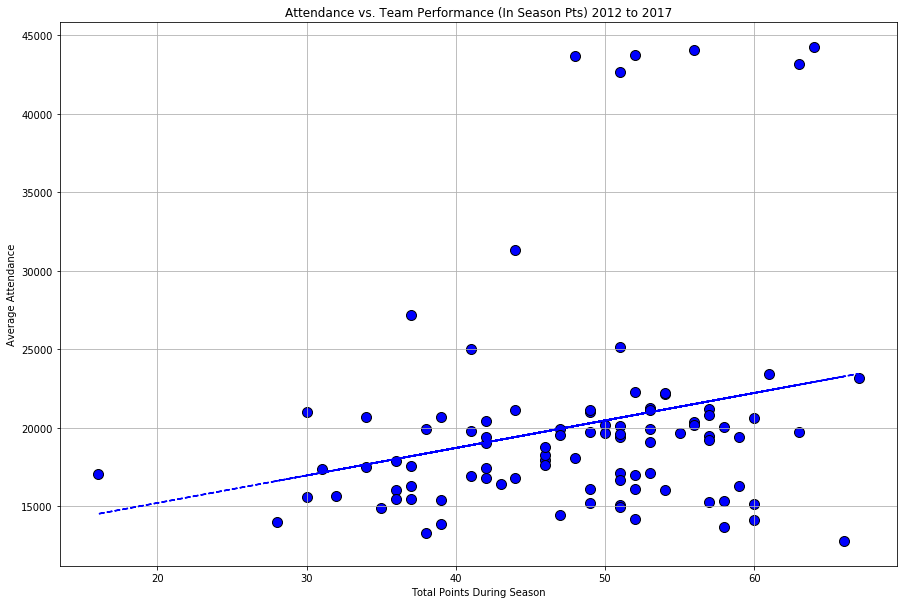

In [7]:
# Performance scatter plot

plt.figure(figsize=(15,10))
plt.scatter(performance_x, y_value, marker='o',s=100,facecolors='b',edgecolors='black')

plt.title("Attendance vs. Team Performance (In Season Pts) 2012 to 2017")
plt.ylabel("Average Attendance")
plt.xlabel("Total Points During Season")
plt.grid()

plt.plot(performance_x,fit,'b--')

plt.savefig("Graphs/TeamPerformance.png")

plt.show()

In [9]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.01816584938826842
R-squared: 0.05915975280184189


### Analysis of Team Performance

As the above test shows, we found a statistically significant p-value but a very low R-squared value, which shows that while team performance is statistically significant, our model is not exceptionally accurate. The relationship between the variables is positive, suggesting that as team performance is higher, MLS attendance is likewise more likely to be higher, but this particular variable will most likely need a different model to better predict what is being seen.

# Age Graph

### Graph 1: Attendance vs. Demographic Age, 18 to 29

In [10]:
(slope, intercept, r_value, p_value, _) = linregress(age_x, y_value)
fit = slope * age_x + intercept

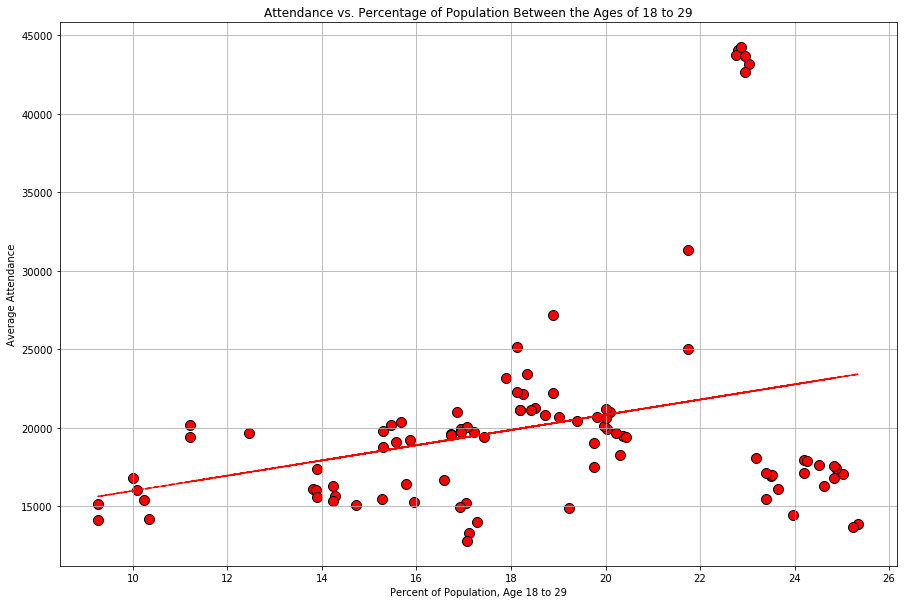

In [11]:
# Age scatter plot

plt.figure(figsize=(15,10))
plt.scatter(age_x, y_value, marker='o',s=100,facecolors='r',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Between the Ages of 18 to 29")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, Age 18 to 29")
plt.grid()

plt.plot(age_x,fit,'b--',color='r')

plt.savefig("Graphs/Age18to29.png")

plt.show()

In [12]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.0039956482225810015
R-squared: 0.08657135195669098


### Analysis of Age Demographics

The 18 to 29 age bracket was the only age group that showed significant results, but it's p-value is enough to conclude that cities with higher proportions of people in the 18 to 29 age range are more likely to have high attendance at their MLS games. The other age group, 30 to 44, was not statistically significant, indicating that cities with younger populations fare better in game attendance in the MLS. It should be noted that, much like team performance, the R-squared value is very low, meaning that the model needs to be changed to perhaps better describe the relationship between these two variables.

This follows the trend of younger Americans finding an interest in international sports. Soccer as a sport has been on the rise lately mostly because of younger audiences reaching an age where they can attend games, and this data helps to support this fact.

# Ethnicity Graphs

### Graph 1: Attendance vs. White Populations

In [13]:
(slope, intercept, r_value, p_value, _) = linregress(ethwhite_x, y_value)
fit = slope * ethwhite_x + intercept

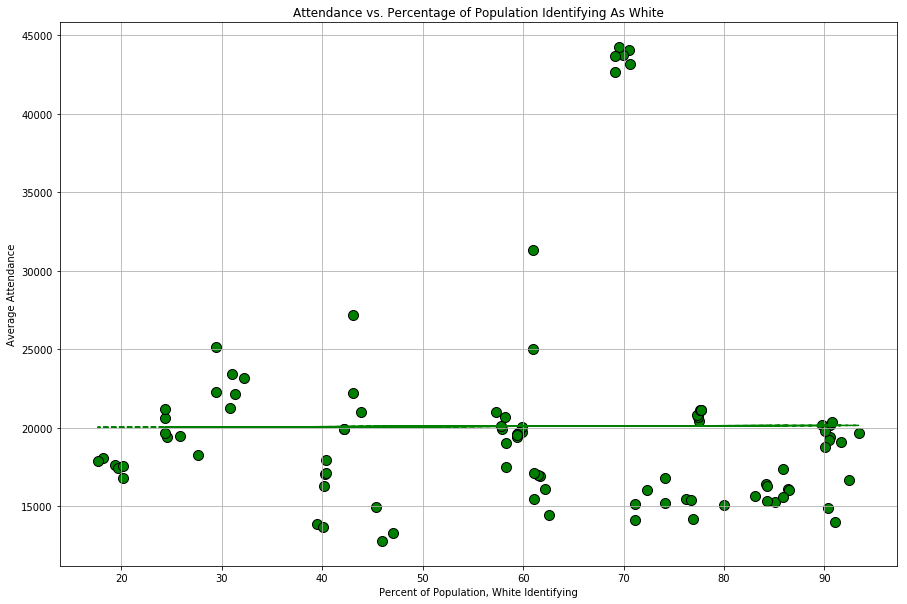

In [14]:
# Ethnicity (White) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethwhite_x, y_value, marker='o',s=100,facecolors='g',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As White")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, White Identifying")
plt.grid()

plt.plot(ethwhite_x,fit,'b--',color='g')

plt.savefig("Graphs/EthnicityWhite.png")

plt.show()

In [15]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.9599000947897681
R-squared: 2.7627328175441898e-05


### Graph 2: Attendance vs. Black Populations

In [16]:
(slope, intercept, r_value, p_value, _) = linregress(ethblack_x, y_value)
fit = slope * ethblack_x + intercept

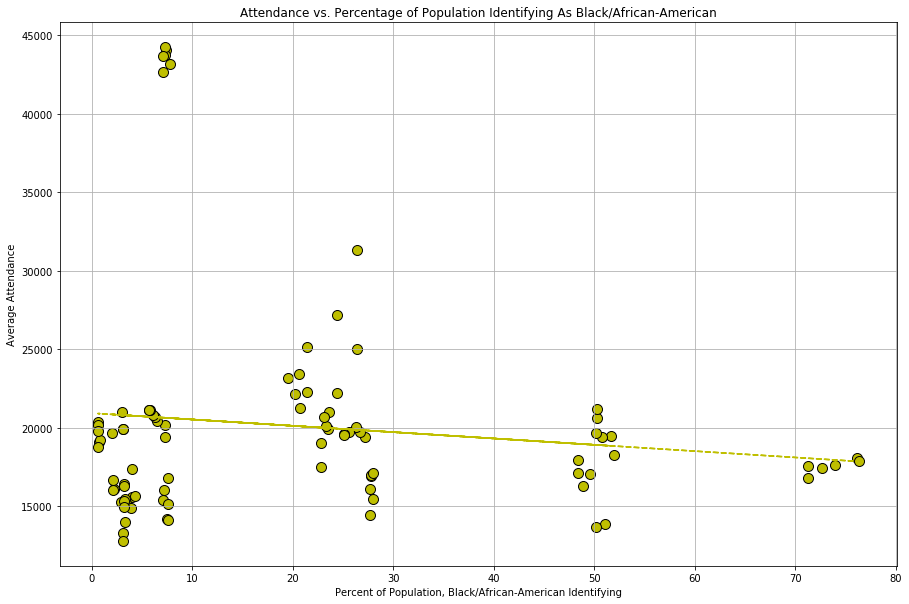

In [17]:
# Ethnicity (Black) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethblack_x, y_value, marker='o',s=100,facecolors='y',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As Black/African-American")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, Black/African-American Identifying")
plt.grid()

plt.plot(ethblack_x,fit,'b--',color='y')

plt.savefig("Graphs/EthnicityBlack.png")

plt.show()

In [18]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.23993479777222845
R-squared: 0.014978997635509117


### Graph 3: Attendance vs. Asian Populations

In [19]:
(slope, intercept, r_value, p_value, _) = linregress(ethasian_x, y_value)
fit = slope * ethasian_x + intercept

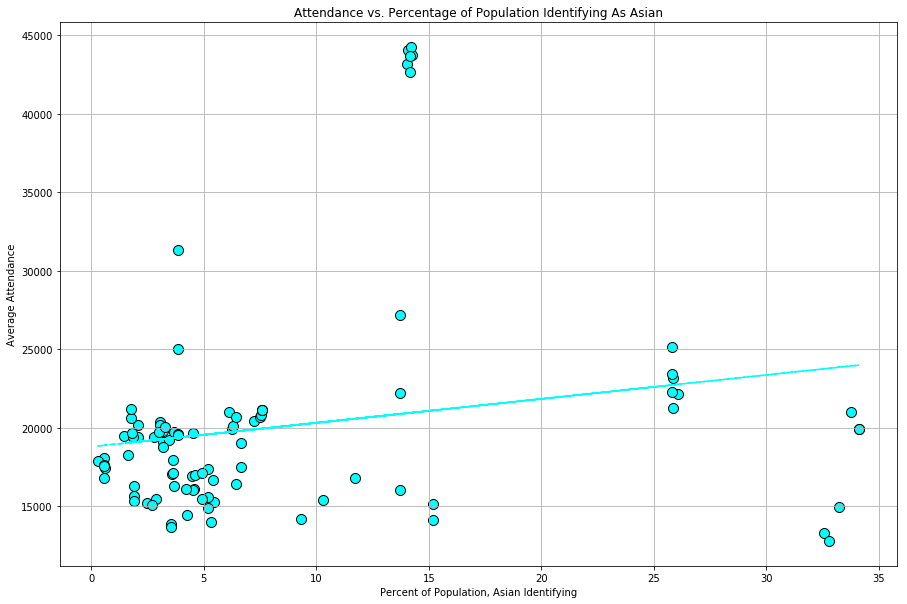

In [20]:
# Ethnicity (Asian) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethasian_x, y_value, marker='o',s=100,facecolors='cyan',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As Asian")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, Asian Identifying")
plt.grid()

plt.plot(ethasian_x,fit,'b--',color='cyan')

plt.savefig("Graphs/EthnicityAsian.png")

plt.show()

In [21]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.05293979829949135
R-squared: 0.04010994882282324


### Analysis of Ethnicity

No ethnic population reported a significant p-value by itself, with the Asian population coming closest at a p-value of 0.053, but that was not low enough to reject the null hypothesis, meaning that, in our observation, ethnicity has no significant impact on MLS attendance.

Looking at the graphs, this seems relatively clear, in that what relationships do seem to exist are scattered and unclear. The White Population graph especially is close to zero in its correlation, while the other graphs are not distinctly trending in any one direction.

The reason for our findings could potentially be because of our data collection methods. We encountered a difficulty of properly representing near-equal geographic locations for each city we polled. The size of the population in the city of Atlanta, for example, is roughly 600,000, while Houston's population is 8 million due to the Houston city limits being spread over a much wider area than Altanta's. The smallest city we had was Foxborough, which had roughly 1,000 people. The vast variance in the size of our Census areas probably contributed to what we see here, and attempting to better capture a good representation of a population by focusing on more particular geographic areas.

# Income Level Graphs

### Graph 1: Attendance vs. Low Income Populations

In [22]:
(slope, intercept, r_value, p_value, _) = linregress(incomelow_x, y_value)
fit = slope * incomelow_x + intercept

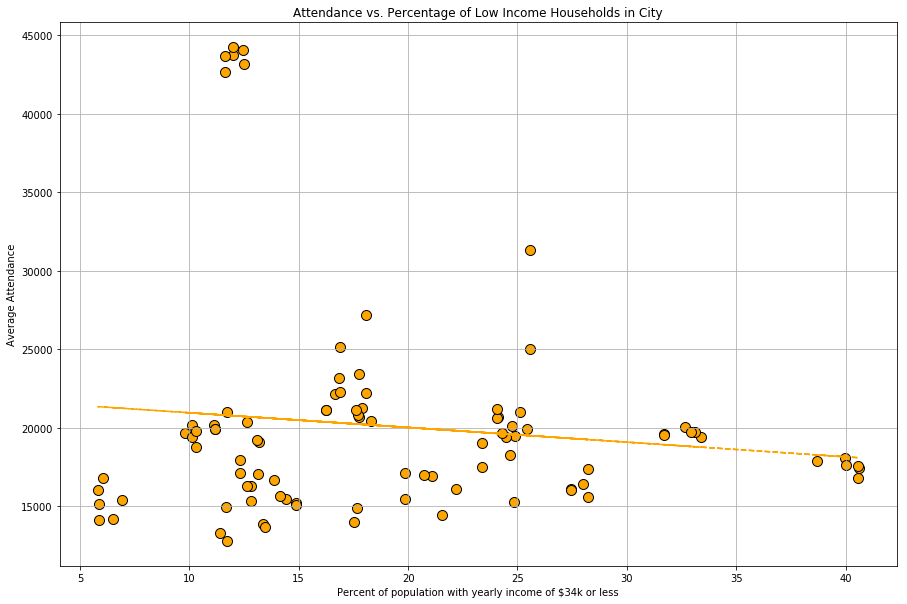

In [23]:
# Low income scatter plot

plt.figure(figsize=(15,10))
plt.scatter(incomelow_x, y_value, marker='o',s=100,facecolors='orange',edgecolors='black')

plt.title("Attendance vs. Percentage of Low Income Households in City")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of population with yearly income of $34k or less")
plt.grid()

plt.plot(incomelow_x,fit,'b--',color='orange')

plt.savefig("Graphs/LowIncome.png")

plt.show()

In [24]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.2484663080939202
R-squared: 0.01445061586479663


### Graph 2: Attendance vs. High Income Populations

In [25]:
(slope, intercept, r_value, p_value, _) = linregress(incomehigh_x, y_value)
fit = slope * incomehigh_x + intercept

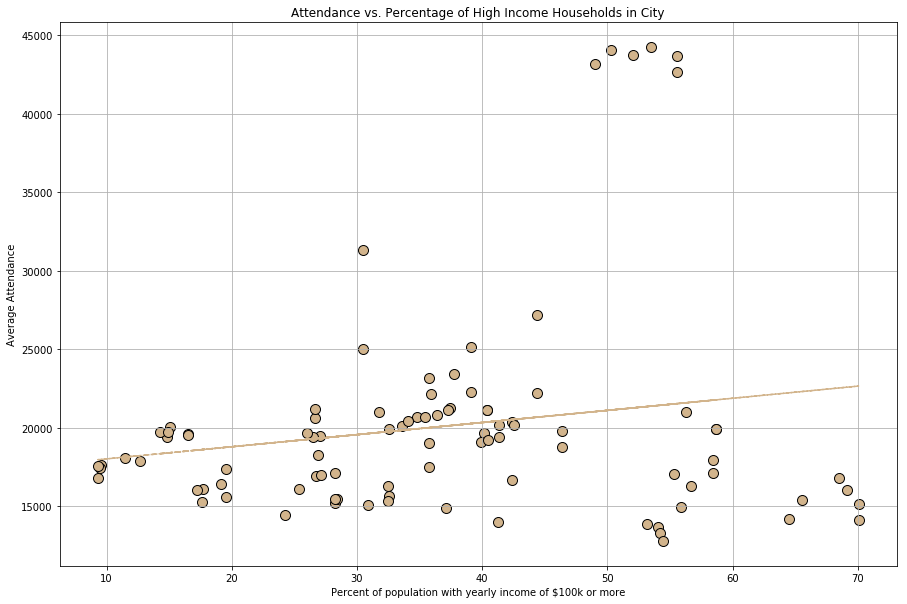

In [26]:
# High income scatter plot

plt.figure(figsize=(15,10))
plt.scatter(incomehigh_x, y_value, marker='o',s=100,facecolors='tan',edgecolors='black')

plt.title("Attendance vs. Percentage of High Income Households in City")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of population with yearly income of $100k or more")
plt.grid()

plt.plot(incomehigh_x,fit,'b--',color='tan')

plt.savefig("Graphs/HighIncome.png")

plt.show()

In [27]:
# Individual p-value & R^2 value

print(f"p-value: {p_value}")
print(f"R-squared: {r_value**2}")

p-value: 0.08873058682519136
R-squared: 0.031167024296981427


### Analysis of Income Groups

From the above tests, we found that neither low and high income groups are statistically significant, and feature low R-squared values, with high income being slightly stronger than low income. Based on this, we cannot reject our null hypotheses, and must conclude that low and high income groups do not have an impact on MLS attendance.

Potentially, we might be able to better explore this relationship by breaking income down into smaller categories and analyzing those categories, or even potentially exploring team revenues to see what role income might play in the popularity of a team.